# Fashion Mnist Dataset

## Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(full_x_train, full_y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
full_x_train.shape

(60000, 28, 28)

In [5]:
full_x_train.dtype

dtype('uint8')

In [6]:
type(full_x_train)

numpy.ndarray

In [7]:
x_valid, x_train = full_x_train[:5000]/255., full_x_train[5000:]/255.
y_valid, y_train = full_y_train[:5000], full_y_train[5000:]

In [8]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## NN architecture

In [9]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # converte cada imagem em uma matriz 1d (equivale a .reshape(-1, 1)). Nâo inclui o tamanho do batch
model.add(keras.layers.Dense(300, activation='relu')) # já inicializa pesos aleatoriamente para quebrar a simetria (necessário ao gradiente descendente)
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # softmax pq as classes são exclusivas

/home/lara/git/neuralnets_lab/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
weights, biases = model.layers[2].get_weights()

In [15]:
weights.shape

(300, 100)

In [16]:
# o batch size por padrão é 32
model.compile(loss="sparse_categorical_crossentropy", # pq temos rótulos esparsos (somente 1 de 0 a 9) e as classes são exclusivas
              optimizer="sgd", # stochastic gradient descent
              metrics=["accuracy"])

## Train

In [18]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_valid, y_valid)) # passar o conjunto de validação é opcional

Epoch 1/30


2024-05-02 07:01:20.658203: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6778 - loss: 1.0050 - val_accuracy: 0.8336 - val_loss: 0.5056
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8245 - loss: 0.5050 - val_accuracy: 0.8492 - val_loss: 0.4429
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8416 - loss: 0.4526 - val_accuracy: 0.8632 - val_loss: 0.4126
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8534 - loss: 0.4213 - val_accuracy: 0.8634 - val_loss: 0.3917
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8587 - loss: 0.4014 - val_accuracy: 0.8704 - val_loss: 0.3760
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8644 - loss: 0.3898 - val_accuracy: 0.8506 - val_loss: 0.4122
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8695 - loss: 0.3669 - val_accuracy: 0.8736 - val_loss: 0.3733
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8748 - loss: 0.3534 - val_accurac

## Evaluate

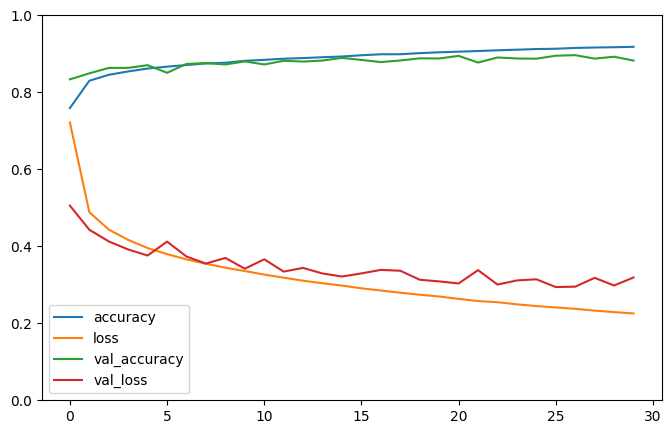

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

- O erro de validação é calculado no fim de cada época, enquanto o erro de treinamento é calculado usando uma média durante cada época.

In [34]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 63.9256


[66.57368469238281, 0.8561999797821045]

In [37]:
# Predições
x_new = x_test[:1]
y_proba = model.predict(x_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)